In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy

Set up random lat and long points and apply them to the API requests

In [2]:
# Create a set of random latitude and longitude combinations
lats= np.random.uniform(low= -90, high= 90, size= 1500)
lngs= np.random.uniform(low= -90, high= 90, size= 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes to a list
coordinates= list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [5]:
# Starting URL for Weather Map API Call
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data
city_data=[]
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list
for i in range(len(cities)):
    # Group citites in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
    # Create endpoint URL with each city
    city_url= url + "&q=" + cities[i]

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 
    # Create endpoint URL with each city
    city_url= url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()
        # Parse out the needed data
        city_lat= city_weather['coord']['lat']
        city_lng= city_weather['coord']['lon']
        city_max_temp= city_weather['main']['temp_max']
        city_humidity= city_weather['main']['humidity']
        city_clouds= city_weather['clouds']['all']
        city_wind= city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date= datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(), "Lat": city_lat,
                         "Lng": city_lng, "Max Temp": city_max_temp,
                         "Humidity": city_humidity, "Cloudiness": city_clouds,
                         "Wind Speed": city_wind, "Country": city_country,
                         "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | hermanus
Processing Record 3 of Set 13 | cape town
Processing Record 4 of Set 13 | chuy
Processing Record 5 of Set 13 | gwadar
Processing Record 6 of Set 13 | port alfred
Processing Record 7 of Set 13 | ibiapina
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | saint-augustin
Processing Record 10 of Set 13 | cidreira
Processing Record 11 of Set 13 | meulaboh
Processing Record 12 of Set 13 | ponta do sol
Processing Record 13 of Set 13 | comodoro rivadavia
Processing Record 14 of Set 13 | longyearbyen
Processing Record 15 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 13 | vila velha
Processing Record 17 of Set 13 | noyabrsk
Processing Record 18 of Set 13 | mobaye
Processing Record 19 of Set 13 | upernavik
Processing Record 20 of Set 13 | bredasdorp
Processing Record 21 of Set 13 | jamestown
Processing Record 22 of Set 13 | kavarat

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,63.00,69,0,8.01,ZA,2021-04-16 20:46:52
1,Cape Town,-33.9258,18.4232,71.01,72,0,1.14,ZA,2021-04-16 20:43:20
2,Chuy,-33.6971,-53.4616,68.85,86,98,4.63,UY,2021-04-16 20:46:52
3,Gwadar,25.1216,62.3254,80.15,73,21,7.92,PK,2021-04-16 20:44:22
4,Port Alfred,-33.5906,26.8910,62.33,63,5,17.05,ZA,2021-04-16 20:46:53
5,Ibiapina,-3.9233,-40.8894,71.82,68,98,2.77,BR,2021-04-16 20:46:53
6,Ushuaia,-54.8000,-68.3000,44.60,65,40,33.38,AR,2021-04-16 20:46:53
7,Saint-Augustin,51.2260,-58.6502,35.38,55,18,10.67,CA,2021-04-16 20:46:54
8,Cidreira,-30.1811,-50.2056,71.69,79,99,6.62,BR,2021-04-16 20:43:14
9,Meulaboh,4.1363,96.1285,75.88,89,100,6.06,ID,2021-04-16 20:46:54


In [15]:
# Reorder the columns
new_columns= ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-04-16 20:46:52,-34.4187,19.2345,63.00,69,0,8.01
1,Cape Town,ZA,2021-04-16 20:43:20,-33.9258,18.4232,71.01,72,0,1.14
2,Chuy,UY,2021-04-16 20:46:52,-33.6971,-53.4616,68.85,86,98,4.63
3,Gwadar,PK,2021-04-16 20:44:22,25.1216,62.3254,80.15,73,21,7.92
4,Port Alfred,ZA,2021-04-16 20:46:53,-33.5906,26.8910,62.33,63,5,17.05


In [16]:
# Create the output file (CSV)
output_data_file= 'weather_data/cities.csv'
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

Visualize the data

In [17]:
# Extract relevant fields from  the DataFrame from plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

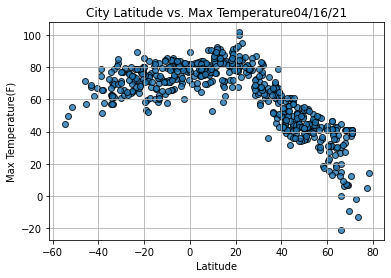

In [23]:
# Import time module 
import time
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

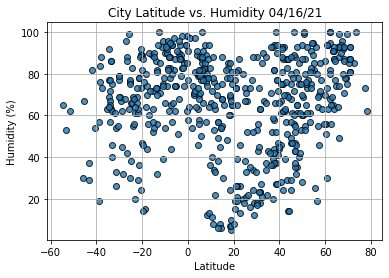

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot
plt.show()

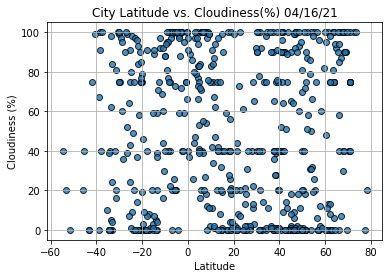

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black",linewidth=1,marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig3.png')
# Show plot
plt.show()

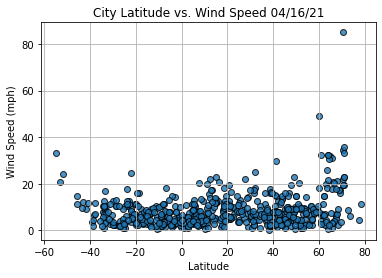

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,wind_speed,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig4.png")
# Show plot
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress
# Create a function to create preform linear regression on the weather data
#  and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err) = linregress(x_values,y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept 
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df= city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df= city_data_df.loc[(city_data_df['Lat'] < 0)]

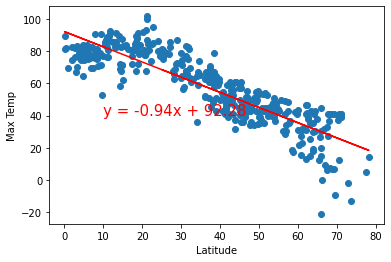

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Himisphere \ for Maximum Temperature', 'Max Temp',(10,40))